In [1]:
# Dependencies
import numpy as np
import pandas as pd 
#import statsmodels.api as sm
#import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#from sklearn.model_selection import KFold
from collections import Counter
import warnings
warnings.simplefilter(action = "ignore") 

In [2]:
# File to Load (Remember to change the path if needed.)
diabetes = "diabetesDB.csv"

# Read the data and store in Dataframe
df = pd.read_csv(diabetes)
df.shape

(945188, 52)

In [3]:
# Create filtered dataframe for only 2015 Data
df = df.loc[( df['IYEAR'] == 2015 )]
df.shape

(440658, 52)

# Exploratory Data Analysis

In [4]:
# Review nulls
df.isnull().sum().sort_values(ascending=False)


ADANXEV     420362
MISTMNT     420354
ADMOVE      420339
ADTHINK     420324
ADFAIL      420310
ADEAT1      420303
ADENERGY    420292
ADSLEEP     420286
ADDOWN      420276
ADPLEASR    420261
ASTHNOW     381389
SCNTMONY    371263
SCNTMEAL    367421
SMOKDAY2    256795
AVEDRNK2    230069
POORHLTH    214211
TOLDHI2      58946
_VEGESUM     50921
_FRUTSUM     43530
_BMI5        36191
EXERANY2     35328
WTKG3        30739
HTM4         15294
USENOW3      14829
SMOKE100     14195
GENHLTH          2
CVDCRHD4         1
BPHIGH4          1
CHECKUP1         1
MEDCOST          1
HAVARTH3         1
PHYSHLTH         1
RACE2            0
_AGE_G           0
index            0
EMPLOY           0
ASTHMA3          0
IYEAR            0
MENTHLTH         0
HLTHPLN1         0
PERSDOC2         0
CVDINFR4         0
CVDSTRK3         0
CHCCOPD          0
_STATE           0
ADDEPEV2         0
CHCKIDNY         0
DIABETE3         0
SEX              0
MARITAL          0
EDUCA            0
RENTHOM1         0
dtype: int64

In [5]:
# Descriptive statistics of the data
df.describe()

,index,_STATE,IYEAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,...,ADMOVE,MISTMNT,ADANXEV,RACE2,_AGE_G,HTM4,WTKG3,_BMI5,_FRUTSUM,_VEGESUM
count,440658.000000,440658.000000,440658.0,440656.000000,440657.000000,440658.000000,226447.000000,440658.000000,440658.000000,440657.000000,...,20319.000000,20304.000000,20296.000000,440658.000000,440658.000000,425364.000000,409919.000000,404467.000000,3.971280e+05,3.897370e+05
mean,220714.915293,29.966981,2015.0,2.577614,60.666906,64.684465,55.773770,1.100620,1.394735,1.915980,...,79.004774,1.878054,1.872192,2.019503,4.444261,169.461593,8092.438394,2804.024534,1.362650e+02,1.947581e+02
std,127427.259510,16.033034,0.0,1.116700,37.054658,35.843267,38.072955,0.508821,0.832276,0.412893,...,25.311006,0.534025,0.583862,2.271043,1.552309,10.564377,2160.837511,665.327551,1.379893e+02,1.556763e+02
min,0.000000,1.000000,2015.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000,2268.000000,1202.000000,5.397605e-79,5.397605e-79
25%,110365.250000,19.000000,2015.0,2.000000,15.000000,28.000000,10.000000,1.000000,1.000000,2.000000,...,88.000000,2.000000,2.000000,1.000000,3.000000,163.000000,6577.000000,2373.000000,5.700000e+01,1.100000e+02
50%,220710.500000,29.000000,2015.0,2.000000,88.000000,88.000000,88.000000,1.000000,1.000000,2.000000,...,88.000000,2.000000,2.000000,1.000000,5.000000,168.000000,7756.000000,2695.000000,1.000000e+02,1.690000e+02
75%,331044.750000,44.000000,2015.0,3.000000,88.000000,88.000000,88.000000,1.000000,1.000000,2.000000,...,88.000000,2.000000,2.000000,1.000000,6.000000,178.000000,9072.000000,3090.000000,2.000000e+02,2.430000e+02
max,441455.000000,72.000000,2015.0,9.000000,99.000000,99.000000,99.000000,9.000000,9.000000,9.000000,...,99.000000,9.000000,9.000000,9.000000,6.000000,241.000000,28985.000000,9995.000000,1.500000e+04,1.992900e+04


# Data Visualization

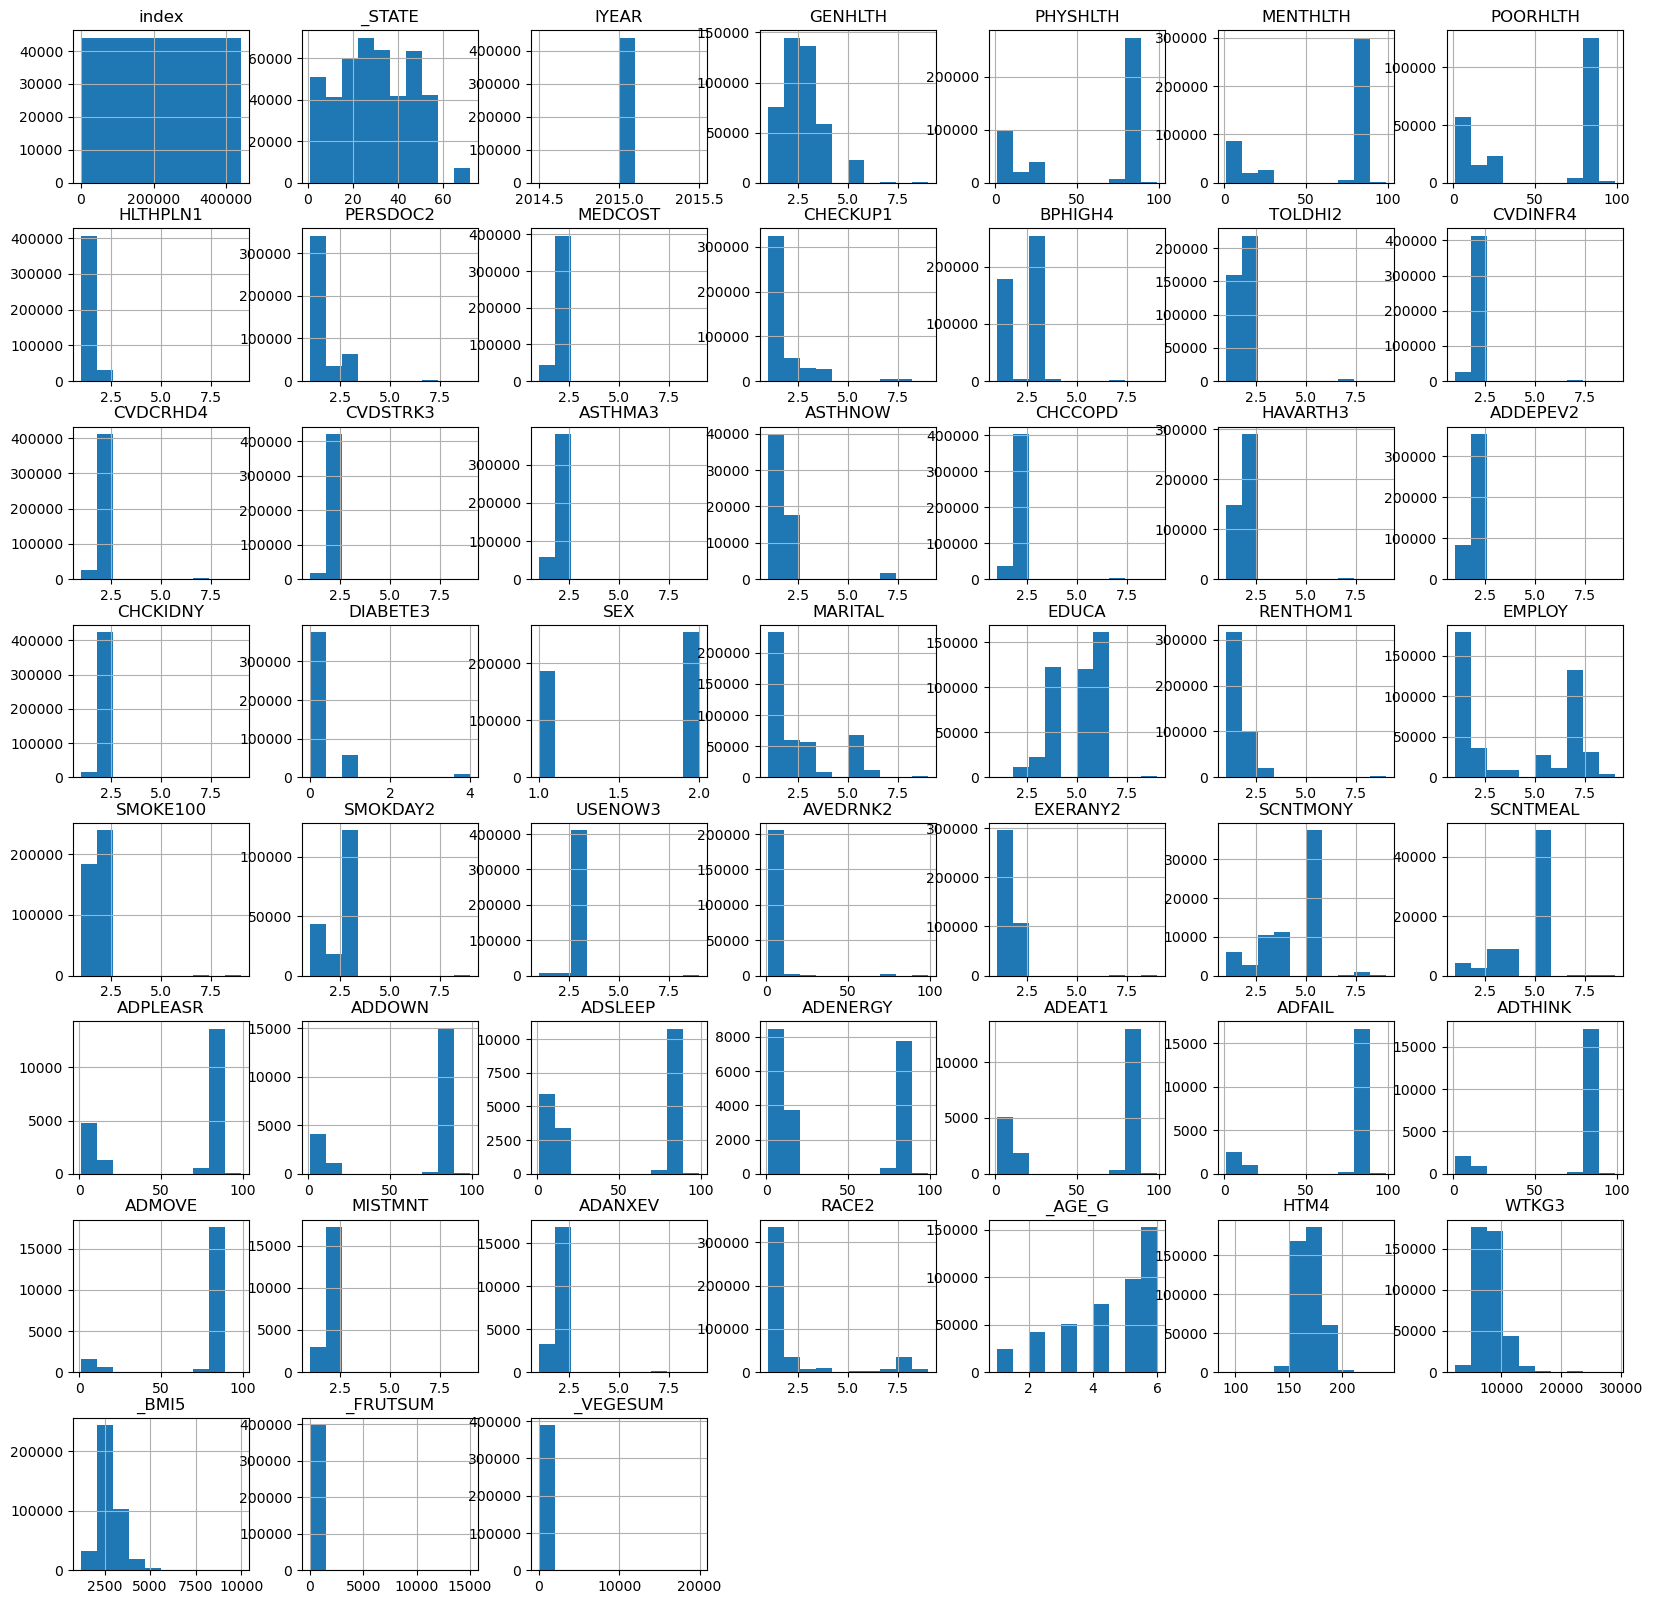

In [6]:
p = df.hist(figsize = (20,20))

In [7]:
# Remove NaN Values from all other fields (Features); replace with a value that is unused in the raw data set
df.fillna(100, inplace=True)

In [8]:
df.isnull().sum()

index       0
_STATE      0
IYEAR       0
GENHLTH     0
PHYSHLTH    0
MENTHLTH    0
POORHLTH    0
HLTHPLN1    0
PERSDOC2    0
MEDCOST     0
CHECKUP1    0
BPHIGH4     0
TOLDHI2     0
CVDINFR4    0
CVDCRHD4    0
CVDSTRK3    0
ASTHMA3     0
ASTHNOW     0
CHCCOPD     0
HAVARTH3    0
ADDEPEV2    0
CHCKIDNY    0
DIABETE3    0
SEX         0
MARITAL     0
EDUCA       0
RENTHOM1    0
EMPLOY      0
SMOKE100    0
SMOKDAY2    0
USENOW3     0
AVEDRNK2    0
EXERANY2    0
SCNTMONY    0
SCNTMEAL    0
ADPLEASR    0
ADDOWN      0
ADSLEEP     0
ADENERGY    0
ADEAT1      0
ADFAIL      0
ADTHINK     0
ADMOVE      0
MISTMNT     0
ADANXEV     0
RACE2       0
_AGE_G      0
HTM4        0
WTKG3       0
_BMI5       0
_FRUTSUM    0
_VEGESUM    0
dtype: int64

# Prepare data for Machine Learning

In [9]:
# split the data into X (features) and y (target):

y = df['DIABETE3']
X = df.drop(columns=['DIABETE3','index'])
X.describe()

,_STATE,IYEAR,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,HLTHPLN1,PERSDOC2,MEDCOST,CHECKUP1,...,ADMOVE,MISTMNT,ADANXEV,RACE2,_AGE_G,HTM4,WTKG3,_BMI5,_FRUTSUM,_VEGESUM
count,440658.000000,440658.0,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,...,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,440658.000000,4.406580e+05,4.406580e+05
mean,29.966981,2015.0,2.578056,60.666996,64.684465,77.272858,1.100620,1.394735,1.916203,1.573538,...,99.031898,95.478879,95.480391,2.019503,4.444261,167.050776,7534.909508,2581.944481,1.326826e+02,1.838081e+02
std,16.033034,0.0,1.135822,37.054663,35.843267,35.121397,0.508821,0.832276,0.438534,1.256077,...,6.994825,20.571697,20.569131,2.271043,1.552309,16.412800,2913.536224,978.517652,1.314426e+02,1.495067e+02
min,1.000000,2015.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,91.000000,100.000000,100.000000,5.397605e-79,5.397605e-79
25%,19.000000,2015.0,2.000000,15.000000,28.000000,88.000000,1.000000,1.000000,2.000000,1.000000,...,100.000000,100.000000,100.000000,1.000000,3.000000,160.000000,6350.000000,2281.000000,6.000000e+01,1.000000e+02
50%,29.000000,2015.0,2.000000,88.000000,88.000000,88.000000,1.000000,1.000000,2.000000,1.000000,...,100.000000,100.000000,100.000000,1.000000,5.000000,168.000000,7711.000000,2645.000000,1.000000e+02,1.530000e+02
75%,44.000000,2015.0,3.000000,88.000000,88.000000,100.000000,1.000000,1.000000,2.000000,2.000000,...,100.000000,100.000000,100.000000,1.000000,6.000000,178.000000,9072.000000,3041.000000,2.000000e+02,2.320000e+02
max,72.000000,2015.0,100.000000,100.000000,99.000000,100.000000,9.000000,9.000000,100.000000,100.000000,...,100.000000,100.000000,100.000000,9.000000,6.000000,241.000000,28985.000000,9995.000000,1.500000e+04,1.992900e+04


In [10]:
# check balance of target column
y.value_counts()

0    375712
1     57256
4      7690
Name: DIABETE3, dtype: int64

In [11]:
# Transform y values to 0 = no diabetes; 1 = yes, diabetes.  Per BRFSS codebook 4 = prediabetes and we consider this as 'yes, diabetes'

y = y.replace({4:1})
y.value_counts()

0    375712
1     64946
Name: DIABETE3, dtype: int64

In [12]:
# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

Counter(y_train)

Counter({1: 43499, 0: 251741})

In [13]:
# Scale the data

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [14]:
# Create and fit RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128)

In [15]:
# Make predictions
predictions = rfc.predict(X_test_scaled)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8604918235706721


In [16]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[121502   2469]
 [ 17818   3629]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    123971
           1       0.60      0.17      0.26     21447

    accuracy                           0.86    145418
   macro avg       0.73      0.57      0.59    145418
weighted avg       0.83      0.86      0.83    145418



In [17]:
# Run Decision Tree model

# Create and fit the decision tree

dtree = DecisionTreeClassifier()
dtree.fit(X_train_scaled, y_train)

DecisionTreeClassifier()

In [18]:
# run predictions and print accuracy

predictions = dtree.predict(X_test_scaled)
print("Accuracy Score =", format(metrics.accuracy_score(y_test,predictions)))

Accuracy Score = 0.7919514778087995


In [19]:
# print confusion matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[107869  16102]
 [ 14152   7295]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88    123971
           1       0.31      0.34      0.33     21447

    accuracy                           0.79    145418
   macro avg       0.60      0.61      0.60    145418
weighted avg       0.80      0.79      0.80    145418



In [20]:
# Calculate Feature importances from Random Forest Classifier
rfc.feature_importances_

array([0.06248487, 0.        , 0.0495288 , 0.03049492, 0.02357214,
       0.02727216, 0.00452006, 0.01250928, 0.00698288, 0.01355428,
       0.04209508, 0.02968913, 0.01019911, 0.01070841, 0.00700201,
       0.00692952, 0.00895397, 0.00834311, 0.0154201 , 0.01045856,
       0.00905187, 0.0096794 , 0.02523501, 0.02845129, 0.01350629,
       0.03103575, 0.01236058, 0.01682208, 0.0058861 , 0.02368976,
       0.01567334, 0.0117123 , 0.01097114, 0.00239489, 0.00215307,
       0.00281353, 0.00306131, 0.00256517, 0.00180897, 0.00177305,
       0.00171251, 0.00155306, 0.00154489, 0.01930619, 0.03009021,
       0.04881595, 0.06786601, 0.08990357, 0.05788862, 0.0699557 ])

(<AxesSubplot:>,)

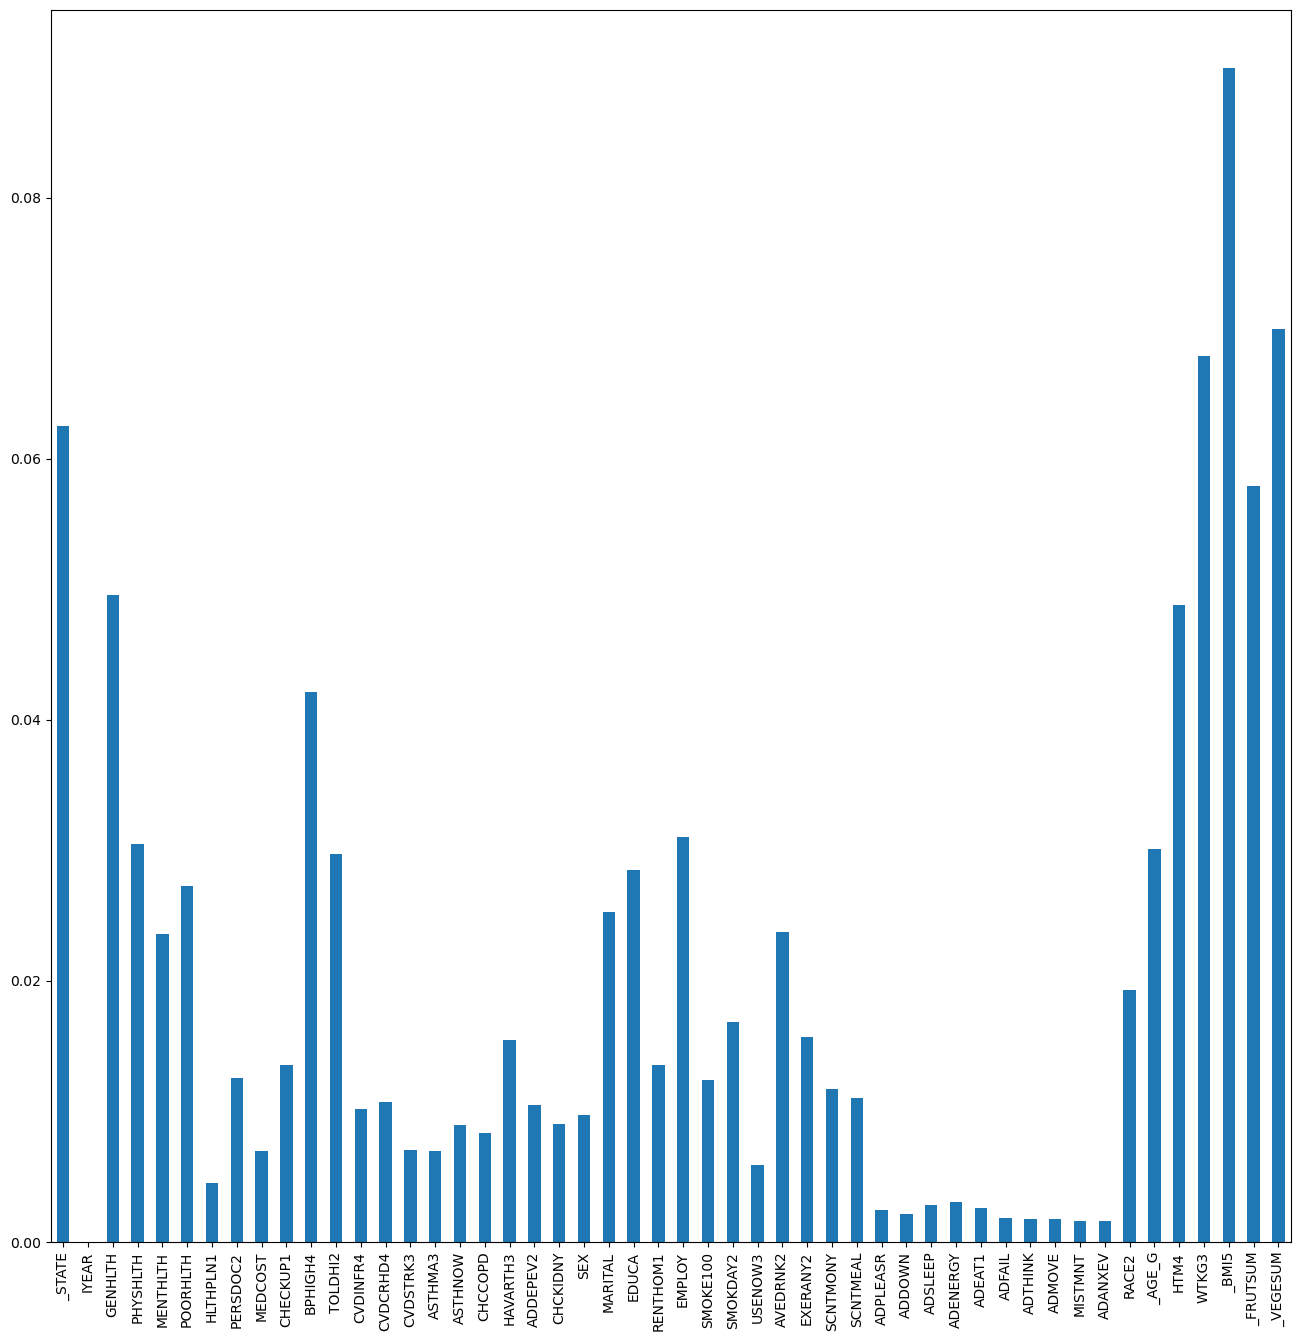

In [21]:
# Plot importances
(pd.Series(rfc.feature_importances_, index=X.columns,).plot(kind='bar', figsize=(16,16)), )

In [22]:
# Based on above importances, reduce the Features to the top 20 most imporantant

index_values = X.columns.to_list()
column_values = ["importance"]
importances = pd.DataFrame(data = rfc.feature_importances_, 
                  index = index_values, 
                  columns = column_values)

importances.sort_values('importance', ascending = False, inplace= True)
importances.head()

,importance
_BMI5,0.089904
_VEGESUM,0.069956
WTKG3,0.067866
_STATE,0.062485
_FRUTSUM,0.057889


In [23]:
top_20 = importances[0:20]
top_20

,importance
_BMI5,0.089904
_VEGESUM,0.069956
WTKG3,0.067866
_STATE,0.062485
_FRUTSUM,0.057889
GENHLTH,0.049529
HTM4,0.048816
BPHIGH4,0.042095
EMPLOY,0.031036
PHYSHLTH,0.030495


In [24]:
cut = importances[20:]
cut

,importance
HAVARTH3,0.015420
CHECKUP1,0.013554
RENTHOM1,0.013506
PERSDOC2,0.012509
SMOKE100,0.012361
SCNTMONY,0.011712
SCNTMEAL,0.010971
CVDCRHD4,0.010708
ADDEPEV2,0.010459
CVDINFR4,0.010199


In [25]:
to_cut = cut.index.to_list()
to_cut

['HAVARTH3',
 'CHECKUP1',
 'RENTHOM1',
 'PERSDOC2',
 'SMOKE100',
 'SCNTMONY',
 'SCNTMEAL',
 'CVDCRHD4',
 'ADDEPEV2',
 'CVDINFR4',
 'SEX',
 'CHCKIDNY',
 'ASTHNOW',
 'CHCCOPD',
 'CVDSTRK3',
 'MEDCOST',
 'ASTHMA3',
 'USENOW3',
 'HLTHPLN1',
 'ADENERGY',
 'ADSLEEP',
 'ADEAT1',
 'ADPLEASR',
 'ADDOWN',
 'ADFAIL',
 'ADTHINK',
 'ADMOVE',
 'MISTMNT',
 'ADANXEV',
 'IYEAR']

In [26]:
# Create new X data with only important columns

X = X.drop(columns=to_cut)
X.head()

,_STATE,GENHLTH,PHYSHLTH,MENTHLTH,POORHLTH,BPHIGH4,TOLDHI2,MARITAL,EDUCA,EMPLOY,SMOKDAY2,AVEDRNK2,EXERANY2,RACE2,_AGE_G,HTM4,WTKG3,_BMI5,_FRUTSUM,_VEGESUM
0,1,5.0,15.0,18,10.0,1.0,1.0,1.0,4.0,8.0,3.0,100.0,2.0,1.0,5,178.0,12701.0,4018.0,50.0,217.0
1,1,3.0,88.0,88,100.0,3.0,2.0,2.0,6.0,3.0,1.0,100.0,1.0,1.0,4,173.0,7484.0,2509.0,24.0,78.0
2,1,4.0,15.0,88,88.0,3.0,1.0,2.0,4.0,7.0,100.0,100.0,100.0,1.0,6,180.0,7167.0,2204.0,100.0,100.0
3,1,5.0,30.0,30,30.0,1.0,1.0,1.0,4.0,8.0,100.0,100.0,2.0,1.0,5,170.0,8165.0,2819.0,100.0,20.0
4,1,5.0,20.0,88,30.0,3.0,2.0,1.0,5.0,8.0,100.0,100.0,2.0,1.0,5,163.0,6441.0,2437.0,100.0,200.0


In [27]:
# Re-run model

# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

Counter(y_train)

Counter({0: 251832, 1: 43408})

In [28]:
# Scale the data

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [29]:
# Create and fit RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128)

In [30]:
# Make predictions
predictions = rfc.predict(X_test_scaled)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8581606128539796


In [31]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[120948   2932]
 [ 17694   3844]]
              precision    recall  f1-score   support

           0       0.87      0.98      0.92    123880
           1       0.57      0.18      0.27     21538

    accuracy                           0.86    145418
   macro avg       0.72      0.58      0.60    145418
weighted avg       0.83      0.86      0.83    145418



In [32]:
# Simplified set of 20 features performs as well in the random forest classifier as the original 53 columns.

In [33]:
# For segment 3:
# Review other machine learning models; can we further downselect features?
# Right now, even if we re-run and re-run the jupyter notebook, the top 20 features remain constant even if we look at 2011 data instead of 2015
# At what number of features does that not remain true?

In [34]:
# Calculate Feature importances
rfc.feature_importances_

array([0.08761521, 0.05694145, 0.03800359, 0.03136101, 0.03430394,
       0.04707343, 0.03539968, 0.03315045, 0.03621858, 0.03883737,
       0.02563959, 0.02677092, 0.02012455, 0.02310623, 0.03479386,
       0.06222851, 0.08485528, 0.11019813, 0.07758968, 0.09578852])

(<AxesSubplot:>,)

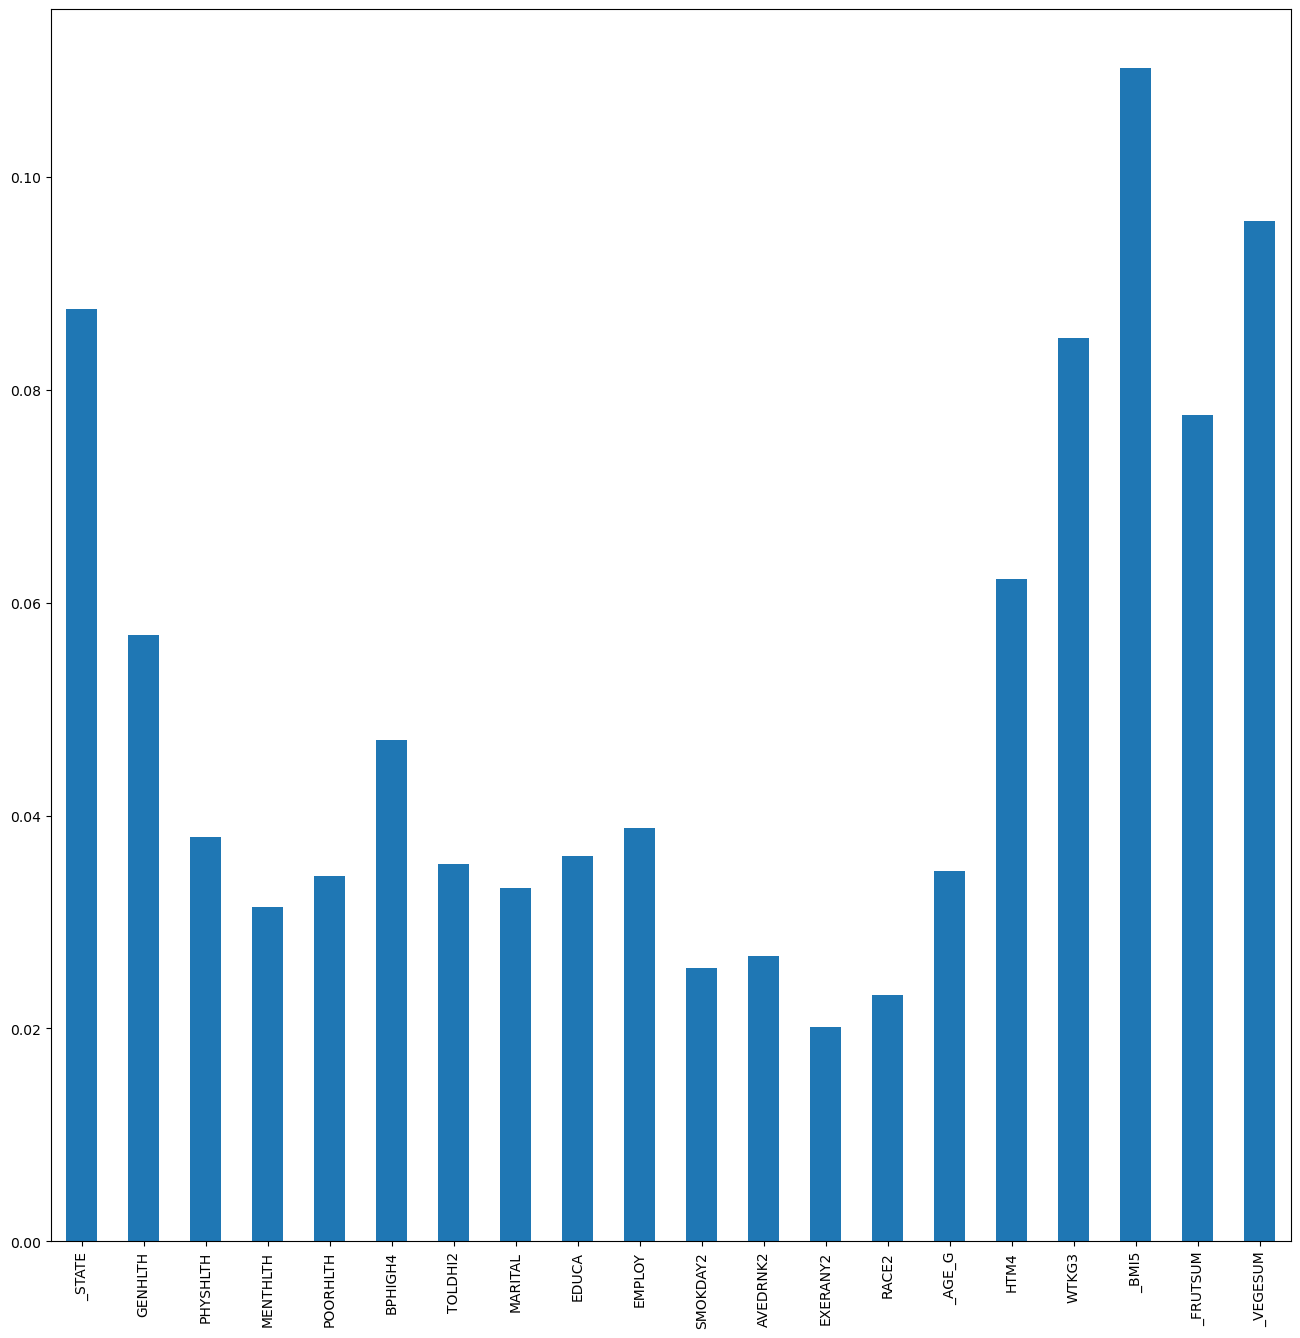

In [35]:
# Plot importances
(pd.Series(rfc.feature_importances_, index=X.columns,).plot(kind='bar', figsize=(16,16)), )

In [36]:
index_values = X.columns.to_list()
column_values = ["importance"]
importances = pd.DataFrame(data = rfc.feature_importances_, 
                  index = index_values, 
                  columns = column_values)

importances.sort_values('importance', ascending = False, inplace= True)
importances.head()

,importance
_BMI5,0.110198
_VEGESUM,0.095789
_STATE,0.087615
WTKG3,0.084855
_FRUTSUM,0.077590


In [37]:
top_10 = importances[0:10]
top_10

,importance
_BMI5,0.110198
_VEGESUM,0.095789
_STATE,0.087615
WTKG3,0.084855
_FRUTSUM,0.077590
HTM4,0.062229
GENHLTH,0.056941
BPHIGH4,0.047073
EMPLOY,0.038837
PHYSHLTH,0.038004


In [38]:
cut = importances[10:]
cut

,importance
EDUCA,0.036219
TOLDHI2,0.035400
_AGE_G,0.034794
POORHLTH,0.034304
MARITAL,0.033150
MENTHLTH,0.031361
AVEDRNK2,0.026771
SMOKDAY2,0.025640
RACE2,0.023106
EXERANY2,0.020125


In [39]:
to_cut = cut.index.to_list()
to_cut

['EDUCA',
 'TOLDHI2',
 '_AGE_G',
 'POORHLTH',
 'MARITAL',
 'MENTHLTH',
 'AVEDRNK2',
 'SMOKDAY2',
 'RACE2',
 'EXERANY2']

In [40]:
# Create new X data with only important columns

X = X.drop(columns=to_cut)
X.head()

,_STATE,GENHLTH,PHYSHLTH,BPHIGH4,EMPLOY,HTM4,WTKG3,_BMI5,_FRUTSUM,_VEGESUM
0,1,5.0,15.0,1.0,8.0,178.0,12701.0,4018.0,50.0,217.0
1,1,3.0,88.0,3.0,3.0,173.0,7484.0,2509.0,24.0,78.0
2,1,4.0,15.0,3.0,7.0,180.0,7167.0,2204.0,100.0,100.0
3,1,5.0,30.0,1.0,8.0,170.0,8165.0,2819.0,100.0,20.0
4,1,5.0,20.0,3.0,8.0,163.0,6441.0,2437.0,100.0,200.0


In [41]:
# Re-run model

# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

Counter(y_train)

Counter({1: 43578, 0: 251662})

In [42]:
# Scale the data

scaler = StandardScaler()
# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [43]:
# Create and fit RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=128)

In [44]:
# Make predictions
predictions = rfc.predict(X_test_scaled)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8519990647650222


In [45]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[120371   3679]
 [ 17843   3525]]
              precision    recall  f1-score   support

           0       0.87      0.97      0.92    124050
           1       0.49      0.16      0.25     21368

    accuracy                           0.85    145418
   macro avg       0.68      0.57      0.58    145418
weighted avg       0.81      0.85      0.82    145418



In [46]:
# State continues to be an important feature, but we think that it may not be a true causal factor.  We will drop state and re-run the analysis.

X = X.drop(columns=['_STATE'])

# Split into training and testing data sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.33)

# Scale the data
scaler = StandardScaler()

# Fitting the Standard Scaler with the training data.
X_scaler = scaler.fit(X_train)

# Scaling the data.
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Create and fit RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=128)
rfc.fit(X_train_scaled, y_train)


RandomForestClassifier(n_estimators=128)

In [47]:
# Make predictions
predictions = rfc.predict(X_test_scaled)

# Calculating the accuracy score.
acc_score = accuracy_score(y_test, predictions)
print(acc_score)

0.8465183127260725


In [48]:
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[119257   4778]
 [ 17541   3842]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91    124035
           1       0.45      0.18      0.26     21383

    accuracy                           0.85    145418
   macro avg       0.66      0.57      0.59    145418
weighted avg       0.81      0.85      0.82    145418

